Notebook and Dataset are for educational purposes only.

**Importing Required Libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.impute import SimpleImputer
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from numpy import mean
%matplotlib inline

In [3]:
warnings.filterwarnings('ignore')

In [4]:
pd.set_option('display.max_columns',None)

**Loading Dataset**

In [7]:
L = pd.read_csv('loan.csv')
L

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,NaN,NaN,3.0,0.0,13648.0,83.7,9.0,f,0.00,0.00,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-2015,171.62,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,NaN,NaN,3.0,0.0,1687.0,9.4,4.0,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-2013,119.66,NaN,Sep-2013,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,NaN,NaN,2.0,0.0,2956.0,98.5,10.0,f,0.00,0.00,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-2014,649.91,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-1996,1.0,35.0,NaN,10.0,0.0,5598.0,21.0,37.0,f,0.00,0.00,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-2015,357.48,NaN,Jan-2015,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-2011,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-1996,0.0,38.0,NaN,15.0,0.0,27783.0,53.9,38.0,f,766.90,766.90,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-2016,67.79,Feb-2016,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887374,36371250,39102635,10000.0,10000.0,10000.0,36 months,11.99,332.10,B,B5,Office Assistant,8 years,RENT,31000.0,Verified,Jan-2015,Current,n,https://www.lendingclub.com/browse/loanDetail....,

In [8]:
L.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           887379 non-null  int64  
 1   member_id                    887379 non-null  int64  
 2   loan_amnt                    887379 non-null  float64
 3   funded_amnt                  887379 non-null  float64
 4   funded_amnt_inv              887379 non-null  float64
 5   term                         887379 non-null  object 
 6   int_rate                     887379 non-null  float64
 7   installment                  887379 non-null  float64
 8   grade                        887379 non-null  object 
 9   sub_grade                    887379 non-null  object 
 10  emp_title                    835917 non-null  object 
 11  emp_length                   842554 non-null  object 
 12  home_ownership               887379 non-null  object 
 13 

In [9]:
L['member_id'].isnull().sum()

0

In [10]:
L['id'].isnull().sum()

0

In [11]:
L.drop(['id' , 'member_id'], axis=1, inplace=True)
L

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,NaN,NaN,3.0,0.0,13648.0,83.7,9.0,f,0.00,0.00,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-2015,171.62,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,NaN,NaN,3.0,0.0,1687.0,9.4,4.0,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-2013,119.66,NaN,Sep-2013,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,NaN,NaN,2.0,0.0,2956.0,98.5,10.0,f,0.00,0.00,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-2014,649.91,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-1996,1.0,35.0,NaN,10.0,0.0,5598.0,21.0,37.0,f,0.00,0.00,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-2015,357.48,NaN,Jan-2015,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-2011,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-1996,0.0,38.0,NaN,15.0,0.0,27783.0,53.9,38.0,f,766.90,766.90,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-2016,67.79,Feb-2016,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887374,10000.0,10000.0,10000.0,36 months,11.99,332.10,B,B5,Office Assistant,8 years,RENT,31000.0,Verified,Jan-2015,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,905xx,CA,28.69,0.0,Sep-2004,0.0,NaN,77.0,9.0,1.0,14037.0,82.1,15.0,f,7055.47,

In [14]:
N = pd.DataFrame(L.isnull().mean()*100)
N.transpose()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.799326,5.051393,0.0,0.000451,0.0,0.0,0.0,0.0,0.0,85.797726,0.0,0.017129,0.0,0.0,0.0,0.003268,0.003268,0.003268,51.197065,84.555303,0.003268,0.003268,0.0,0.056571,0.003268,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.990018,0.0,28.507661,0.005973,0.01634,75.015974,0.0,0.0,99.942415,99.94264,99.942415,0.003268,7.919502,7.919502,97.591559,97.591559,97.591559,97.591559,97.654892,97.591559,97.902024,97.591559,97.591559,97.591559,97.591559,7.919502,97.591559,97.591559,97.591559


In [13]:
L.duplicated().sum()

0

In [11]:
col = list(L.columns)
col

['loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'next_pymnt_d',
 'last_credit_pull_d',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'policy_code',
 'application_type',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_acc_6m',

In [12]:
L['loan_status'].value_counts()

Current                                                601779
Fully Paid                                             207723
Charged Off                                             45248
Late (31-120 days)                                      11591
Issued                                                   8460
In Grace Period                                          6253
Late (16-30 days)                                        2357
Does not meet the credit policy. Status:Fully Paid       1988
Default                                                  1219
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

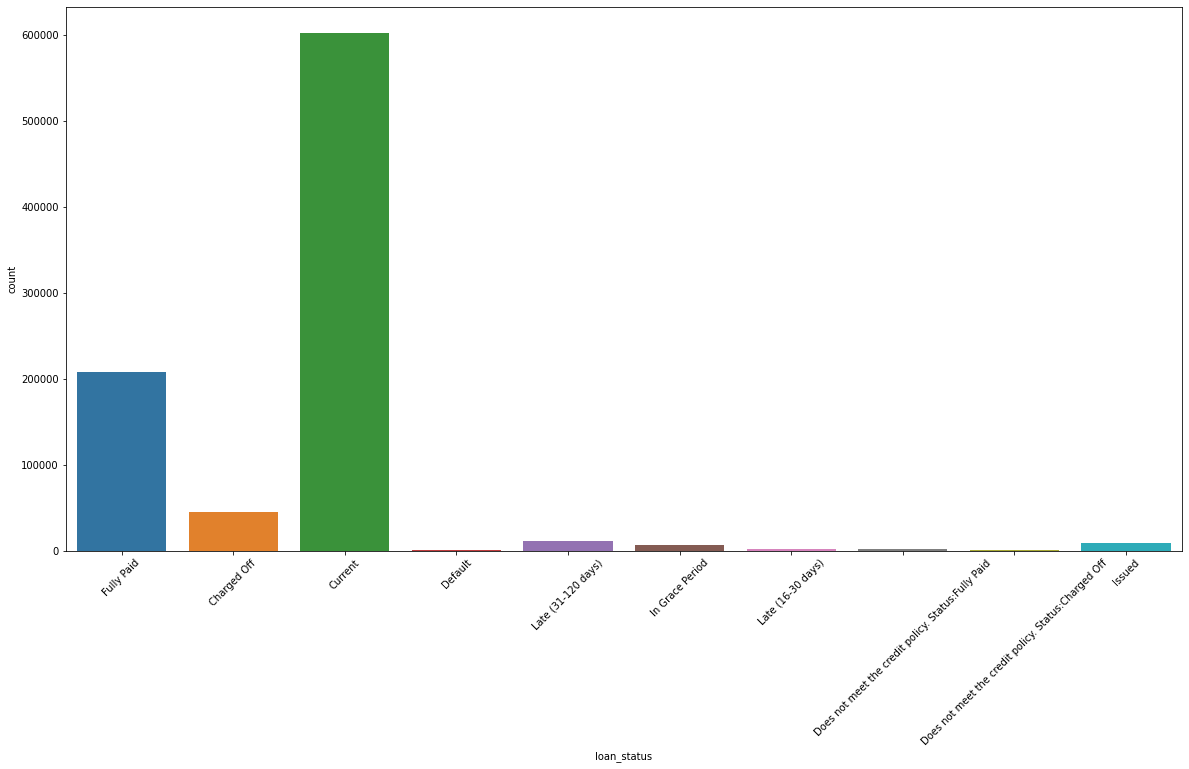

In [13]:
plt.figure(figsize=(20,10))
chart = sns.countplot(x=L['loan_status'], data=L)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.show()

In [14]:
L["target"] = np.where(
    L['loan_status'].isin(['Charged Off','Default','Does not meet the credit policy. Status:Charged Off']),1,0)

In [15]:
L

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,target
0,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,NaN,NaN,3.0,0.0,13648.0,83.7,9.0,f,0.00,0.00,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-2015,171.62,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,NaN,NaN,3.0,0.0,1687.0,9.4,4.0,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-2013,119.66,NaN,Sep-2013,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,NaN,NaN,2.0,0.0,2956.0,98.5,10.0,f,0.00,0.00,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-2014,649.91,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-1996,1.0,35.0,NaN,10.0,0.0,5598.0,21.0,37.0,f,0.00,0.00,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-2015,357.48,NaN,Jan-2015,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-2011,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-1996,0.0,38.0,NaN,15.0,0.0,27783.0,53.9,38.0,f,766.90,766.90,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-2016,67.79,Feb-2016,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887374,10000.0,10000.0,10000.0,36 months,11.99,332.10,B,B5,Office Assistant,8 years,RENT,31000.0,Verified,Jan-2015,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,905xx,CA,28.69,0.0,Sep-2004,0.0,NaN,77.0,9.0,1.0,14037.0

In [16]:
L = L.drop(['loan_status'], axis=1)

In [17]:
L['target'].mean()

0.053221904056778443

In [18]:
data = L.loc[:,L.isnull().mean()<=0.25]
data

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,target
0,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,n,https://www.lendingclub.com/browse/loanDetail....,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,3.0,0.0,13648.0,83.7,9.0,f,0.00,0.00,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-2015,171.62,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,0
1,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,n,https://www.lendingclub.com/browse/loanDetail....,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,3.0,0.0,1687.0,9.4,4.0,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-2013,119.66,Sep-2013,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,1
2,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,n,https://www.lendingclub.com/browse/loanDetail....,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,2.0,0.0,2956.0,98.5,10.0,f,0.00,0.00,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-2014,649.91,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,0
3,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,n,https://www.lendingclub.com/browse/loanDetail....,other,personel,917xx,CA,20.00,0.0,Feb-1996,1.0,10.0,0.0,5598.0,21.0,37.0,f,0.00,0.00,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-2015,357.48,Jan-2015,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,0
4,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-2011,n,https://www.lendingclub.com/browse/loanDetail....,other,Personal,972xx,OR,17.94,0.0,Jan-1996,0.0,15.0,0.0,27783.0,53.9,38.0,f,766.90,766.90,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-2016,67.79,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887374,10000.0,10000.0,10000.0,36 months,11.99,332.10,B,B5,Office Assistant,8 years,RENT,31000.0,Verified,Jan-2015,n,https://www.lendingclub.com/browse/loanDetail....,debt_consolidation,Debt consolidation,905xx,CA,28.69,0.0,Sep-2004,0.0,9.0,1.0,14037.0,82.1,15.0,f,7055.47,7055.47,3971.880000,3971.88,2944.53,1027.35,0.00,0.00,0.00,Jan-2016,332.10,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,25274.0,17100.0,0
887375,24000.0,24000.0,24000.0,36 months,11.99,797.03,B,B5,Director of Maintenance,10+ years,MORTGAGE,79000.0,Verified,Jan-2015,n,https://www.lendingclub.com/browse/loanDetail....,home_improvement,Home improvement,072xx,NJ,3.90,0.0,Mar-1974,1.0,5.0,0.0,8621.0,84.5,23.0,f,16933.26,16933.26,9532.390000,9532.39,7066.74,2465.65,0.00,0.00,0.00,Jan-2016,797.03,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,140285.0,10200.0,0
887376,13000.0,13000.0,13000.0,60 months,15.99,316.07,D,D2,Radiologist Technologist,5 years,RENT,35000.0,Verified,Jan-2015,n,https://www.lendingclub.com/browse/loanDetail....,debt_consolidation,Debt consolidation,378xx,TN,30.90,0.0,Sep-2003,0.0,9.0,1.0,11031.0,61.3,22.0,w,11155.50,11155.50,3769.740000,3769.74,1844.50,1925.24,0.00,0.00,0.00,Jan-2016,316.07,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,34178.0,18000.0,0
887377,12000.0,12000.0,12000.0,60 months,19.99,317.86,E,E3,Painter,1 year,RENT,64400.0,Source Verified,Jan-2015,n,https://www.lendingcl

In [19]:
Y = data[['target']]
X = data.drop(['target'], axis=1)

In [20]:
X.dtypes

loan_amnt                     float64
funded_amnt                   float64
funded_amnt_inv               float64
term                           object
int_rate                      float64
installment                   float64
grade                          object
sub_grade                      object
emp_title                      object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                        object
pymnt_plan                     object
url                            object
purpose                        object
title                          object
zip_code                       object
addr_state                     object
dti                           float64
delinq_2yrs                   float64
earliest_cr_line               object
inq_last_6mths                float64
open_acc                      float64
pub_rec                       float64
revol_bal   

**Saperating Character and Numerical Features**

In [21]:
num = X.select_dtypes(include='number')
char = X.select_dtypes(include='object')

In [22]:
num.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,5000.0,5000.0,4975.0,10.65,162.87,24000.0,27.65,0.0,1.0,3.0,0.0,13648.0,83.7,9.0,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,171.62,0.0,1.0,0.0,NaN,NaN,NaN
1,2500.0,2500.0,2500.0,15.27,59.83,30000.0,1.00,0.0,5.0,3.0,0.0,1687.0,9.4,4.0,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,119.66,0.0,1.0,0.0,NaN,NaN,NaN
2,2400.0,2400.0,2400.0,15.96,84.33,12252.0,8.72,0.0,2.0,2.0,0.0,2956.0,98.5,10.0,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,649.91,0.0,1.0,0.0,NaN,NaN,NaN
3,10000.0,10000.0,10000.0,13.49,339.31,49200.0,20.00,0.0,1.0,10.0,0.0,5598.0,21.0,37.0,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,357.48,0.0,1.0,0.0,NaN,NaN,NaN
4,3000.0,3000.0,3000.0,12.69,67.79,80000.0,17.94,0.0,0.0,15.0,0.0,27783.0,53.9,38.0,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,67.79,0.0,1.0,0.0,NaN,NaN,NaN


In [23]:
num.isnull().mean()*100

loan_amnt                     0.000000
funded_amnt                   0.000000
funded_amnt_inv               0.000000
int_rate                      0.000000
installment                   0.000000
annual_inc                    0.000451
dti                           0.000000
delinq_2yrs                   0.003268
inq_last_6mths                0.003268
open_acc                      0.003268
pub_rec                       0.003268
revol_bal                     0.000000
revol_util                    0.056571
total_acc                     0.003268
out_prncp                     0.000000
out_prncp_inv                 0.000000
total_pymnt                   0.000000
total_pymnt_inv               0.000000
total_rec_prncp               0.000000
total_rec_int                 0.000000
total_rec_late_fee            0.000000
recoveries                    0.000000
collection_recovery_fee       0.000000
last_pymnt_amnt               0.000000
collections_12_mths_ex_med    0.016340
policy_code              

In [24]:
char.head()

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,pymnt_plan,url,purpose,title,zip_code,addr_state,earliest_cr_line,initial_list_status,last_pymnt_d,last_credit_pull_d,application_type
0,36 months,B,B2,NaN,10+ years,RENT,Verified,Dec-2011,n,https://www.lendingclub.com/browse/loanDetail....,credit_card,Computer,860xx,AZ,Jan-1985,f,Jan-2015,Jan-2016,INDIVIDUAL
1,60 months,C,C4,Ryder,< 1 year,RENT,Source Verified,Dec-2011,n,https://www.lendingclub.com/browse/loanDetail....,car,bike,309xx,GA,Apr-1999,f,Apr-2013,Sep-2013,INDIVIDUAL
2,36 months,C,C5,NaN,10+ years,RENT,Not Verified,Dec-2011,n,https://www.lendingclub.com/browse/loanDetail....,small_business,real estate business,606xx,IL,Nov-2001,f,Jun-2014,Jan-2016,INDIVIDUAL
3,36 months,C,C1,AIR RESOURCES BOARD,10+ years,RENT,Source Verified,Dec-2011,n,https://www.lendingclub.com/browse/loanDetail....,other,personel,917xx,CA,Feb-1996,f,Jan-2015,Jan-2015,INDIVIDUAL
4,60 months,B,B5,University Medical Group,1 year,RENT,Source Verified,Dec-2011,n,https://www.lendingclub.com/browse/loanDetail....,other,Personal,972xx,OR,Jan-1996,f,Jan-2016,Jan-2016,INDIVIDUAL


In [25]:
char.isnull().mean()*100

term                   0.000000
grade                  0.000000
sub_grade              0.000000
emp_title              5.799326
emp_length             5.051393
home_ownership         0.000000
verification_status    0.000000
issue_d                0.000000
pymnt_plan             0.000000
url                    0.000000
purpose                0.000000
title                  0.017129
zip_code               0.000000
addr_state             0.000000
earliest_cr_line       0.003268
initial_list_status    0.000000
last_pymnt_d           1.990018
last_credit_pull_d     0.005973
application_type       0.000000
dtype: float64

In [26]:
def outlier(x):
    x=x.clip(lower = x.quantile(0.01))
    x = x.clip(upper = x.quantile(0.99))
    return(x)

In [27]:
num = num.apply(lambda x : outlier(x))

In [28]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
num1 = pd.DataFrame(imputer.fit_transform(num), index=num.index, columns=num.columns)

In [29]:
num1.isnull().mean()*100

loan_amnt                     0.0
funded_amnt                   0.0
funded_amnt_inv               0.0
int_rate                      0.0
installment                   0.0
annual_inc                    0.0
dti                           0.0
delinq_2yrs                   0.0
inq_last_6mths                0.0
open_acc                      0.0
pub_rec                       0.0
revol_bal                     0.0
revol_util                    0.0
total_acc                     0.0
out_prncp                     0.0
out_prncp_inv                 0.0
total_pymnt                   0.0
total_pymnt_inv               0.0
total_rec_prncp               0.0
total_rec_int                 0.0
total_rec_late_fee            0.0
recoveries                    0.0
collection_recovery_fee       0.0
last_pymnt_amnt               0.0
collections_12_mths_ex_med    0.0
policy_code                   0.0
acc_now_delinq                0.0
tot_coll_amt                  0.0
tot_cur_bal                   0.0
total_rev_hi_l

In [30]:
char1 = char.fillna(0)

In [31]:
char1.isnull().mean()*100

term                   0.0
grade                  0.0
sub_grade              0.0
emp_title              0.0
emp_length             0.0
home_ownership         0.0
verification_status    0.0
issue_d                0.0
pymnt_plan             0.0
url                    0.0
purpose                0.0
title                  0.0
zip_code               0.0
addr_state             0.0
earliest_cr_line       0.0
initial_list_status    0.0
last_pymnt_d           0.0
last_credit_pull_d     0.0
application_type       0.0
dtype: float64

In [32]:
char1.columns.tolist()

['term',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'verification_status',
 'issue_d',
 'pymnt_plan',
 'url',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'earliest_cr_line',
 'initial_list_status',
 'last_pymnt_d',
 'last_credit_pull_d',
 'application_type']

In [33]:
char1 = char1.drop(['last_credit_pull_d','title','zip_code','url','issue_d','sub_grade','emp_title','addr_state','earliest_cr_line','last_pymnt_d'], axis=1)

In [34]:
char1.head()

,term,grade,emp_length,home_ownership,verification_status,pymnt_plan,purpose,initial_list_status,application_type
0,36 months,B,10+ years,RENT,Verified,n,credit_card,f,INDIVIDUAL
1,60 months,C,< 1 year,RENT,Source Verified,n,car,f,INDIVIDUAL
2,36 months,C,10+ years,RENT,Not Verified,n,small_business,f,INDIVIDUAL
3,36 months,C,10+ years,RENT,Source Verified,n,other,f,INDIVIDUAL
4,60 months,B,1 year,RENT,Source Verified,n,other,f,INDIVIDUAL


**Feature Selection for Numerical Features**

In [35]:
discrete = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')
num_binned = pd.DataFrame(discrete.fit_transform(num1), index=num1.index, columns=num1.columns).add_suffix('_Rank')
num_binned.head()

,loan_amnt_Rank,funded_amnt_Rank,funded_amnt_inv_Rank,int_rate_Rank,installment_Rank,annual_inc_Rank,dti_Rank,delinq_2yrs_Rank,inq_last_6mths_Rank,open_acc_Rank,pub_rec_Rank,revol_bal_Rank,revol_util_Rank,total_acc_Rank,out_prncp_Rank,out_prncp_inv_Rank,total_pymnt_Rank,total_pymnt_inv_Rank,total_rec_prncp_Rank,total_rec_int_Rank,total_rec_late_fee_Rank,recoveries_Rank,collection_recovery_fee_Rank,last_pymnt_amnt_Rank,collections_12_mths_ex_med_Rank,policy_code_Rank,acc_now_delinq_Rank,tot_coll_amt_Rank,tot_cur_bal_Rank,total_rev_hi_lim_Rank
0,1.0,1.0,0.0,2.0,0.0,0.0,8.0,0.0,1.0,0.0,0.0,5.0,8.0,0.0,0.0,0.0,5.0,5.0,6.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,6.0,6.0
1,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,6.0,6.0
2,0.0,0.0,0.0,7.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,3.0,3.0,4.0,3.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,2.0,6.0,6.0
3,3.0,3.0,3.0,5.0,4.0,2.0,6.0,0.0,1.0,4.0,0.0,2.0,0.0,8.0,0.0,0.0,7.0,7.0,8.0,7.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,2.0,6.0,6.0
4,0.0,0.0,0.0,4.0,0.0,6.0,5.0,0.0,0.0,8.0,0.0,8.0,4.0,8.0,0.0,0.0,3.0,3.0,3.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,6.0,6.0


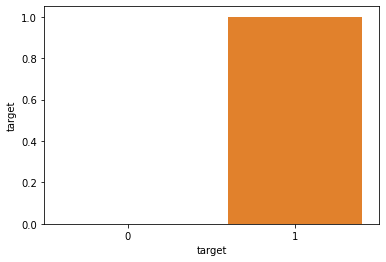

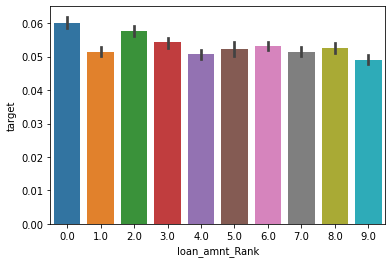

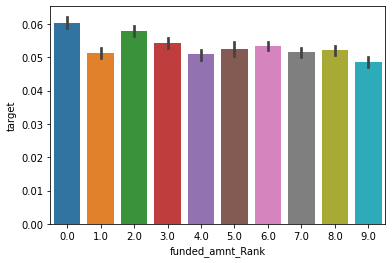

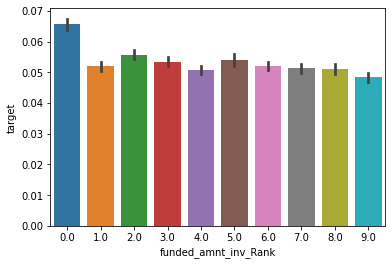

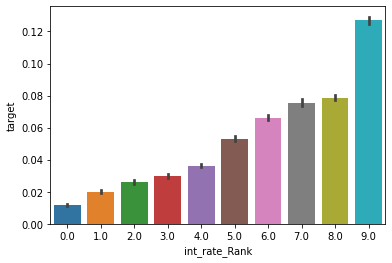

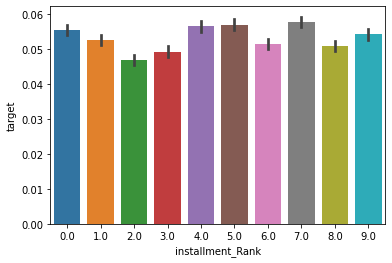

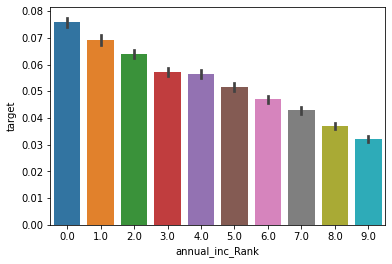

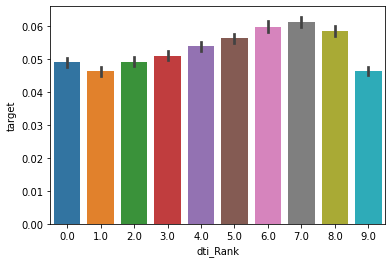

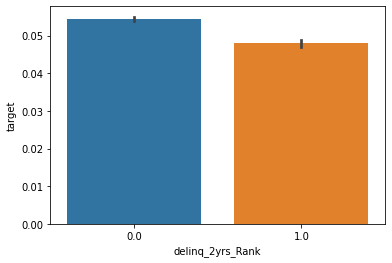

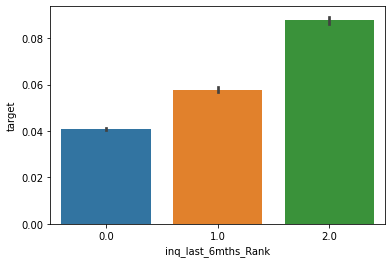

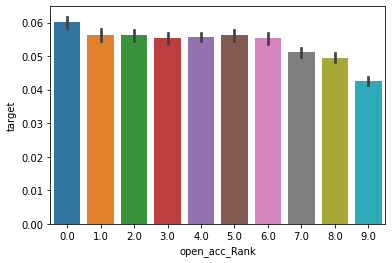

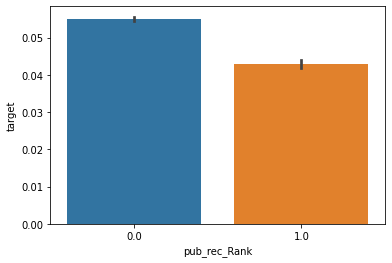

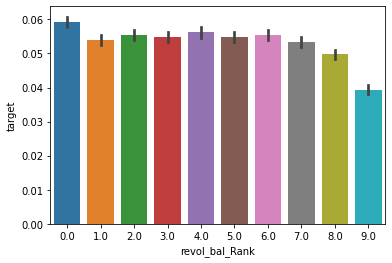

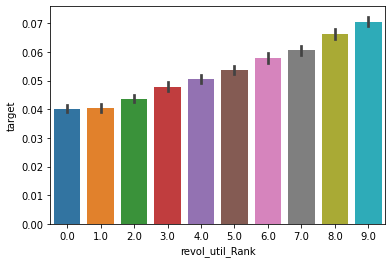

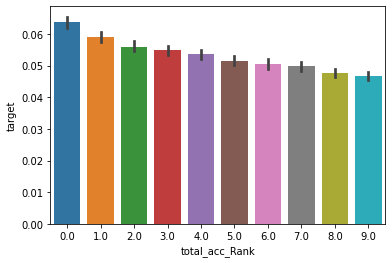

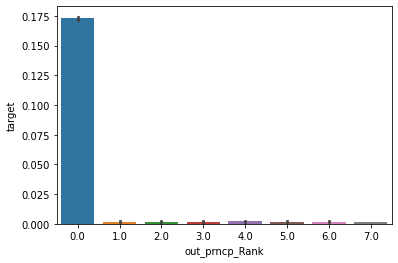

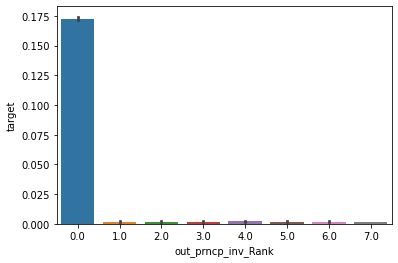

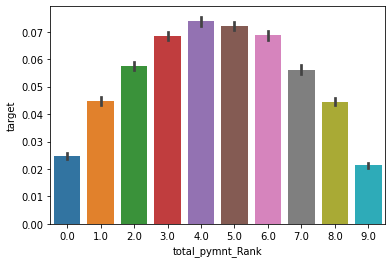

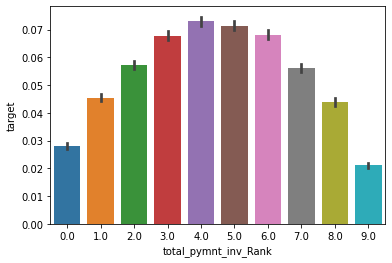

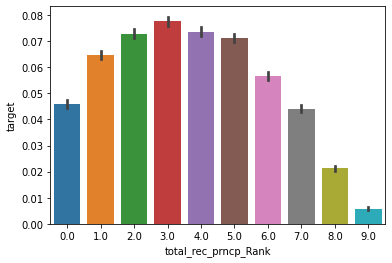

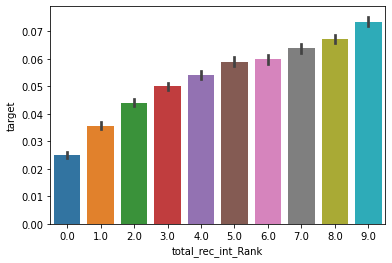

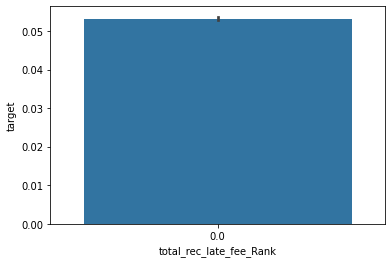

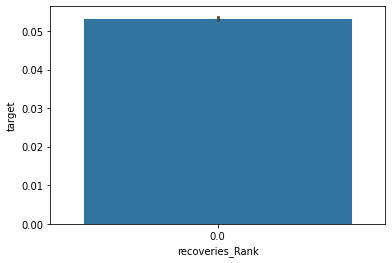

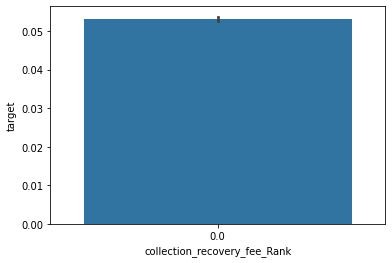

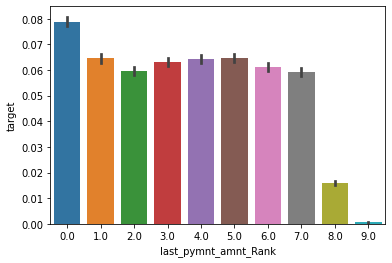

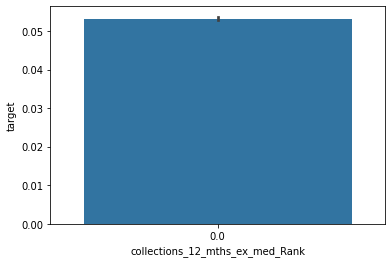

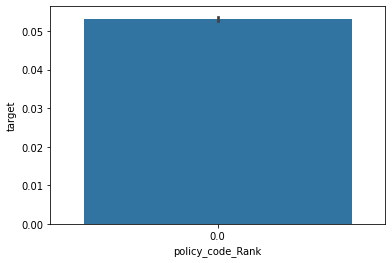

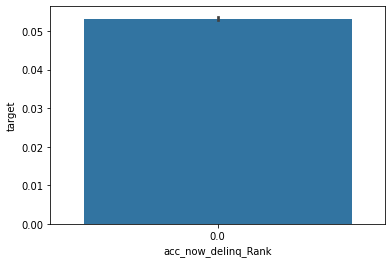

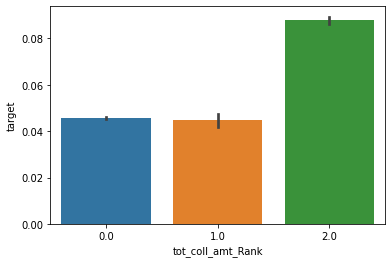

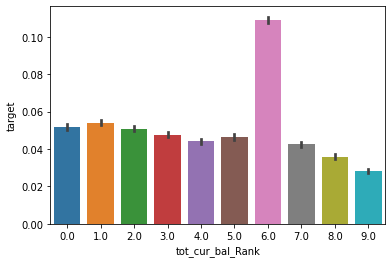

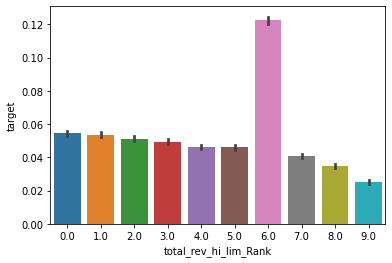

In [36]:
Xbinned = pd.concat([Y, num_binned], join='inner', axis=1)
columnbinned = Xbinned.columns
for c in (columnbinned):
    plt.figure()
    sns.barplot(x=c, y='target', estimator=mean, data=Xbinned)
plt.show()

In [37]:
selector = SelectKBest(chi2, k=15)
Xnew = selector.fit_transform(num1, Y)
cols = selector.get_support(indices=True)
numfeatures = num1.iloc[:,cols]

In [38]:
numfeatures

,funded_amnt_inv,annual_inc,revol_bal,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,recoveries,collection_recovery_fee,last_pymnt_amnt,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,4975.0,24000.0,13648.0,0.00,0.00,5861.071414,5831.78,5000.00,861.07,0.00,0.00,171.62,132.053983,137182.970736,31274.143259
1,2500.0,30000.0,1687.0,0.00,0.00,1008.710000,1008.71,456.46,435.17,117.08,1.11,119.66,132.053983,137182.970736,31274.143259
2,2400.0,19000.0,2956.0,0.00,0.00,3003.653644,3003.65,2400.00,603.65,0.00,0.00,649.91,132.053983,137182.970736,31274.143259
3,10000.0,49200.0,5598.0,0.00,0.00,12226.302212,12226.30,10000.00,2209.33,0.00,0.00,357.48,132.053983,137182.970736,31274.143259
4,3000.0,80000.0,27783.0,766.90,766.90,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,67.79,132.053983,137182.970736,31274.143259
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887374,10000.0,31000.0,14037.0,7055.47,7055.47,3971.880000,3971.88,2944.53,1027.35,0.00,0.00,332.10,0.000000,25274.000000,17100.000000
887375,24000.0,79000.0,8621.0,16933.26,16933.26,9532.390000,9532.39,7066.74,2465.65,0.00,0.00,797.03,0.000000,140285.000000,10200.000000
887376,13000.0,35000.0,11031.0,11155.50,11155.50,3769.740000,3769.74,1844.50,1925.24,0.00,0.00,316.07,0.000000,34178.000000,18000.000000
887377,12000.0,64400.0,8254.0,10447.31,10447.31,3787.670000,3787.67,1552.69,2234.98,0.00,0.00,317.86,0.000000,58418.000000,27000.000000


In [39]:
numfeatures.dtypes

funded_amnt_inv            float64
annual_inc                 float64
revol_bal                  float64
out_prncp                  float64
out_prncp_inv              float64
total_pymnt                float64
total_pymnt_inv            float64
total_rec_prncp            float64
total_rec_int              float64
recoveries                 float64
collection_recovery_fee    float64
last_pymnt_amnt            float64
tot_coll_amt               float64
tot_cur_bal                float64
total_rev_hi_lim           float64
dtype: object

**Feature Selection for Character Features**

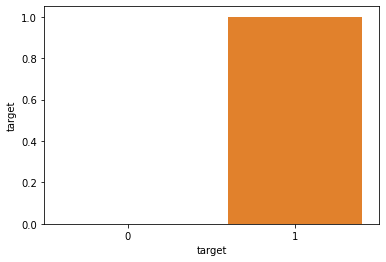

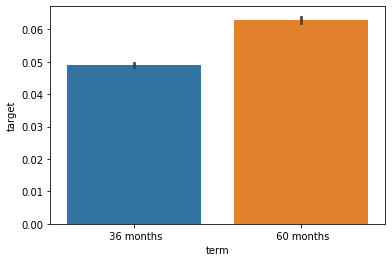

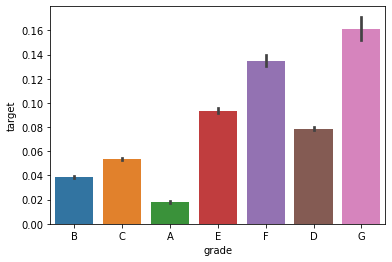

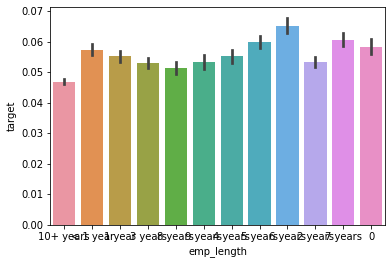

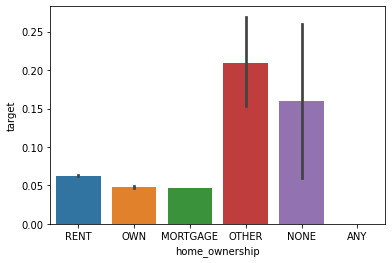

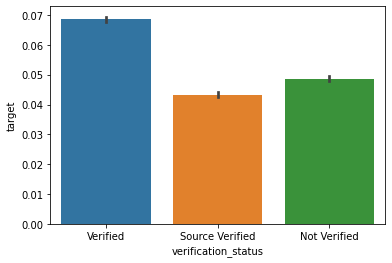

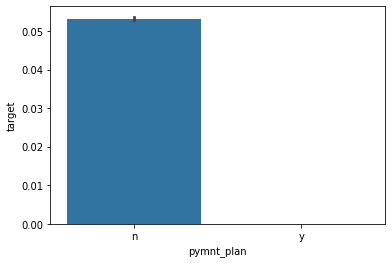

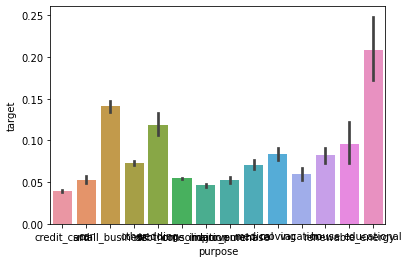

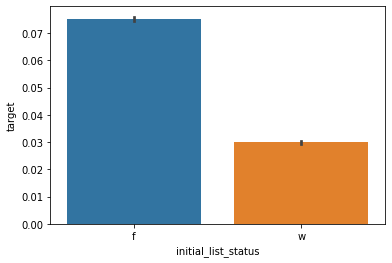

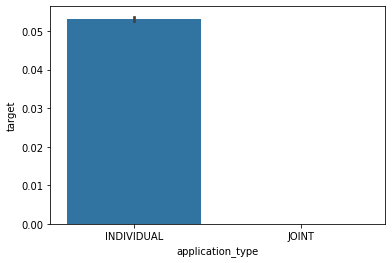

In [40]:
Xchar = pd.concat([Y, char1], join='inner', axis=1)
columnChar = Xchar.columns
for c in (columnChar):
    plt.figure()
    sns.barplot(x=c, y='target', estimator=mean, data=Xchar)
plt.show()

In [41]:
# Steps to regroup categorical features in order to achieve linear discrimination
# These levels to group have been discovered through the pivot analysis

In [42]:
char1.head()

,term,grade,emp_length,home_ownership,verification_status,pymnt_plan,purpose,initial_list_status,application_type
0,36 months,B,10+ years,RENT,Verified,n,credit_card,f,INDIVIDUAL
1,60 months,C,< 1 year,RENT,Source Verified,n,car,f,INDIVIDUAL
2,36 months,C,10+ years,RENT,Not Verified,n,small_business,f,INDIVIDUAL
3,36 months,C,10+ years,RENT,Source Verified,n,other,f,INDIVIDUAL
4,60 months,B,1 year,RENT,Source Verified,n,other,f,INDIVIDUAL


In [43]:
char1['purpose'].unique()

array(['credit_card', 'car', 'small_business', 'other', 'wedding',
       'debt_consolidation', 'home_improvement', 'major_purchase',
       'medical', 'moving', 'vacation', 'house', 'renewable_energy',
       'educational'], dtype=object)

In [44]:
char1['verification_status'].unique()

array(['Verified', 'Source Verified', 'Not Verified'], dtype=object)

In [45]:
char1['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE', 'ANY'], dtype=object)

In [46]:
char1['term'].value_counts()

 36 months    621125
 60 months    266254
Name: term, dtype: int64

In [47]:
char1['initial_list_status'].value_counts()

f    456848
w    430531
Name: initial_list_status, dtype: int64

In [48]:
char1.columns

Index(['term', 'grade', 'emp_length', 'home_ownership', 'verification_status',
       'pymnt_plan', 'purpose', 'initial_list_status', 'application_type'],
      dtype='object')

In [49]:
char1['purpose_1']=np.where(char1['purpose'].isin(['credit_card','car', 'other','debt_consolidation', 'home_improvement', 
                                                   'major_purchase','medical', 'vacation']), 'others', char1['purpose'])
char1['verification_1'] = np.where(char1['verification_status'].isin(['Verified', 'Source Verified']), 'verified', 
                                   char1['verification_status'])
char1['home_ownership_1'] = np.where(char1['home_ownership'].isin(['OWN', 'MORTGAGE']),'OWN', 
                                     np.where(char1['home_ownership'].isin(['RENT']),'RENT', 'OTHER'))
char1['term_1'] = np.where(char1['term'].str.contains('36 months'),'36','60' )

In [50]:
char1=char1.drop(['verification_status','initial_list_status','home_ownership','purpose','term'], axis=1)
char1

,grade,emp_length,pymnt_plan,application_type,purpose_1,verification_1,home_ownership_1,term_1
0,B,10+ years,n,INDIVIDUAL,others,verified,RENT,36
1,C,< 1 year,n,INDIVIDUAL,others,verified,RENT,60
2,C,10+ years,n,INDIVIDUAL,small_business,Not Verified,RENT,36
3,C,10+ years,n,INDIVIDUAL,others,verified,RENT,36
4,B,1 year,n,INDIVIDUAL,others,verified,RENT,60
...,...,...,...,...,...,...,...,...
887374,B,8 years,n,INDIVIDUAL,others,verified,RENT,36
887375,B,10+ years,n,INDIVIDUAL,others,verified,OWN,36
887376,D,5 years,n,INDIVIDUAL,others,verified,RENT,60
887377,E,1 year,n,INDIVIDUAL,others,verified,RENT,60


In [51]:
Xdum = pd.get_dummies(char1, drop_first=True)

In [52]:
Xdum

,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,emp_length_1 year,emp_length_10+ years,emp_length_2 years,emp_length_3 years,emp_length_4 years,emp_length_5 years,emp_length_6 years,emp_length_7 years,emp_length_8 years,emp_length_9 years,emp_length_< 1 year,pymnt_plan_y,application_type_JOINT,purpose_1_house,purpose_1_moving,purpose_1_others,purpose_1_renewable_energy,purpose_1_small_business,purpose_1_wedding,verification_1_verified,home_ownership_1_OWN,home_ownership_1_RENT,term_1_60
0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,1
2,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0
4,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887374,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0
887375,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0
887376,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1
887377,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1


In [53]:
selectorchar = SelectKBest(chi2, k=25)
Xnew = selectorchar.fit_transform(Xdum, Y)
cols = selectorchar.get_support(indices=True)
charfeatures = Xdum.iloc[:,cols]

In [54]:
charfeatures

,grade_B,grade_D,grade_E,grade_F,grade_G,emp_length_1 year,emp_length_10+ years,emp_length_4 years,emp_length_5 years,emp_length_6 years,emp_length_7 years,emp_length_8 years,emp_length_< 1 year,pymnt_plan_y,application_type_JOINT,purpose_1_house,purpose_1_moving,purpose_1_others,purpose_1_renewable_energy,purpose_1_small_business,purpose_1_wedding,verification_1_verified,home_ownership_1_OWN,home_ownership_1_RENT,term_1_60
0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0
1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,1
2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0
4,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887374,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0
887375,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0
887376,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1
887377,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1


In [55]:
num1

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,5000.0,5000.0,4975.0,10.65,162.87,24000.0,27.65,0.0,1.0,3.0,0.0,13648.0,83.7,9.0,0.00,0.00,5861.071414,5831.78,5000.00,861.07,0.0,0.00,0.00,171.62,0.0,1.0,0.0,132.053983,137182.970736,31274.143259
1,2500.0,2500.0,2500.0,15.27,60.65,30000.0,1.98,0.0,4.0,3.0,0.0,1687.0,9.4,6.0,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,119.66,0.0,1.0,0.0,132.053983,137182.970736,31274.143259
2,2400.0,2400.0,2400.0,15.96,84.33,19000.0,8.72,0.0,2.0,3.0,0.0,2956.0,98.5,10.0,0.00,0.00,3003.653644,3003.65,2400.00,603.65,0.0,0.00,0.00,649.91,0.0,1.0,0.0,132.053983,137182.970736,31274.143259
3,10000.0,10000.0,10000.0,13.49,339.31,49200.0,20.00,0.0,1.0,10.0,0.0,5598.0,21.0,37.0,0.00,0.00,12226.302212,12226.30,10000.00,2209.33,15.0,0.00,0.00,357.48,0.0,1.0,0.0,132.053983,137182.970736,31274.143259
4,3000.0,3000.0,3000.0,12.69,67.79,80000.0,17.94,0.0,0.0,15.0,0.0,27783.0,53.9,38.0,766.90,766.90,3242.170000,3242.17,2233.10,1009.07,0.0,0.00,0.00,67.79,0.0,1.0,0.0,132.053983,137182.970736,31274.143259
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887374,10000.0,10000.0,10000.0,11.99,332.10,31000.0,28.69,0.0,0.0,9.0,1.0,14037.0,82.1,15.0,7055.47,7055.47,3971.880000,3971.88,2944.53,1027.35,0.0,0.00,0.00,332.10,0.0,1.0,0.0,0.000000,25274.000000,17100.000000
887375,24000.0,24000.0,24000.0,11.99,797.03,79000.0,3.90,0.0,1.0,5.0,0.0,8621.0,84.5,23.0,16933.26,16933.26,9532.390000,9532.39,7066.74,2465.65,0.0,0.00,0.00,797.03,0.0,1.0,0.0,0.000000,140285.000000,10200.000000
887376,13000.0,13000.0,13000.0,15.99,316.07,35000.0,30.90,0.0,0.0,9.0,1.0,11031.0,61.3,22.0,11155.50,11155.50,3769.740000,3769.74,1844.50,1925.24,0.0,0.00,0.00,316.07,0.0,1.0,0.0,0.000000,34178.000000,18000.000000
887377,12000.0,12000.0,12000.0,19.99,317.86,64400.0,27.19,1.0,2.0,17.0,0.0,8254.0,30.6,20.0,10447.31,10447.31,3787.670000,3787.67,1552.69,2234.98,0.0,0.00,0.00,317.86,1.0,1.0,0.0,0.000000,58418.000000,27000.000000


In [56]:
num_add = num1.loc[:,['int_rate','inq_last_6mths']]                         # added because KBest did not selected them.
num_add

,int_rate,inq_last_6mths
0,10.65,1.0
1,15.27,4.0
2,15.96,2.0
3,13.49,1.0
4,12.69,0.0
...,...,...
887374,11.99,0.0
887375,11.99,1.0
887376,15.99,0.0
887377,19.99,2.0


**Concatinating All Important Features**

In [57]:
Xallfea = pd.concat([num_add, charfeatures, numfeatures], axis=1, join='inner')
Xallfea

,int_rate,inq_last_6mths,grade_B,grade_D,grade_E,grade_F,grade_G,emp_length_1 year,emp_length_10+ years,emp_length_4 years,emp_length_5 years,emp_length_6 years,emp_length_7 years,emp_length_8 years,emp_length_< 1 year,pymnt_plan_y,application_type_JOINT,purpose_1_house,purpose_1_moving,purpose_1_others,purpose_1_renewable_energy,purpose_1_small_business,purpose_1_wedding,verification_1_verified,home_ownership_1_OWN,home_ownership_1_RENT,term_1_60,funded_amnt_inv,annual_inc,revol_bal,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,recoveries,collection_recovery_fee,last_pymnt_amnt,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,10.65,1.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,4975.0,24000.0,13648.0,0.00,0.00,5861.071414,5831.78,5000.00,861.07,0.00,0.00,171.62,132.053983,137182.970736,31274.143259
1,15.27,4.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,1,2500.0,30000.0,1687.0,0.00,0.00,1008.710000,1008.71,456.46,435.17,117.08,1.11,119.66,132.053983,137182.970736,31274.143259
2,15.96,2.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,2400.0,19000.0,2956.0,0.00,0.00,3003.653644,3003.65,2400.00,603.65,0.00,0.00,649.91,132.053983,137182.970736,31274.143259
3,13.49,1.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,10000.0,49200.0,5598.0,0.00,0.00,12226.302212,12226.30,10000.00,2209.33,0.00,0.00,357.48,132.053983,137182.970736,31274.143259
4,12.69,0.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,3000.0,80000.0,27783.0,766.90,766.90,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,67.79,132.053983,137182.970736,31274.143259
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887374,11.99,0.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,10000.0,31000.0,14037.0,7055.47,7055.47,3971.880000,3971.88,2944.53,1027.35,0.00,0.00,332.10,0.000000,25274.000000,17100.000000
887375,11.99,1.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,24000.0,79000.0,8621.0,16933.26,16933.26,9532.390000,9532.39,7066.74,2465.65,0.00,0.00,797.03,0.000000,140285.000000,10200.000000
887376,15.99,0.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,13000.0,35000.0,11031.0,11155.50,11155.50,3769.740000,3769.74,1844.50,1925.24,0.00,0.00,316.07,0.000000,34178.000000,18000.000000
887377,19.99,2.0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,12000.0,64400.0,8254.0,10447.31,10447.31,3787.670000,3787.67,1552.69,2234.98,0.00,0.00,317.86,0.000000,58418.000000,27000.000000


In [58]:
Y['target'].value_counts()

0    840151
1     47228
Name: target, dtype: int64

In [59]:
Y.mean()

target    0.053222
dtype: float64

**Test Train Split**

In [60]:
Xtrain, Xtest, Ytrain, Ytest= train_test_split(Xallfea, Y, test_size=0.2, random_state=101)

In [61]:
print('Ytrain mean:', Ytrain.mean())
print('Ytest mean:', Ytest.mean())

Ytrain mean: target    0.05322
dtype: float64
Ytest mean: target    0.05323
dtype: float64


**Importing Models and Creating a Pipeline**

In [62]:
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [63]:
pipeline_dt=Pipeline([('dt_classifier',DecisionTreeClassifier(max_depth=4, random_state=0, criterion='gini'))])

In [64]:
pipeline_rf= Pipeline([('rf_classifier', RandomForestClassifier(max_depth=4, random_state=0, n_estimators=100))])

In [65]:
pipeline_gb=Pipeline([('gb_classifier', GradientBoostingClassifier())])

In [66]:
pipelines = [pipeline_dt, pipeline_rf, pipeline_gb]

In [67]:
for pipe in pipelines:
    pipe.fit(Xtrain, Ytrain)

**Model Evaluation**

In [68]:
pipe_dict = {0: 'Decision Tree', 1: 'Random Forest', 2: 'Gradient Boosting Classifier'}

for i, model in enumerate(pipelines):
    print(f'{pipe_dict[i]} Test Accuracy: {model.score(Xtest,Ytest)}')

Decision Tree Test Accuracy: 0.9889224458518335
Random Forest Test Accuracy: 0.974633189839753
Gradient Boosting Classifier Test Accuracy: 0.9969404313822714


In [69]:
best_accuracy=0.0
best_pipeline=''
best_classifier=0


for i, model in enumerate(pipelines):
    if model.score(Xtest,Ytest)>best_accuracy:
        best_accuracy = model.score(Xtest, Ytest)
        best_pipeline = model
        best_classifier = i
print(f'Classifier with best accuracy: {pipe_dict[best_classifier]}')

Classifier with best accuracy: Gradient Boosting Classifier


In [70]:
for i, model in enumerate(pipelines):
    predY = model.predict(Xtest)
    print(f' {pipe_dict[i]}\n {confusion_matrix(Ytest, predY)}')

 Decision Tree
 [[167995     34]
 [  1932   7515]]
 Random Forest
 [[168029      0]
 [  4502   4945]]
 Gradient Boosting Classifier
 [[168004     25]
 [   518   8929]]


In [71]:
for i, model in enumerate(pipelines):
    print(f' {pipe_dict[i]} - classification report \n{classification_report(Ytest, predY)}')

 Decision Tree - classification report 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    168029
           1       1.00      0.95      0.97      9447

    accuracy                           1.00    177476
   macro avg       1.00      0.97      0.98    177476
weighted avg       1.00      1.00      1.00    177476

 Random Forest - classification report 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    168029
           1       1.00      0.95      0.97      9447

    accuracy                           1.00    177476
   macro avg       1.00      0.97      0.98    177476
weighted avg       1.00      1.00      1.00    177476

 Gradient Boosting Classifier - classification report 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    168029
           1       1.00      0.95      0.97      9447

    accuracy                           1.00    

In [72]:
for i, model in enumerate(pipelines):
    print(f' {pipe_dict[i]} - Accuracy Score \n{metrics.accuracy_score(Ytest, predY)}')

 Decision Tree - Accuracy Score 
0.9969404313822714
 Random Forest - Accuracy Score 
0.9969404313822714
 Gradient Boosting Classifier - Accuracy Score 
0.9969404313822714


In [73]:
for i, model in enumerate(pipelines):
    print(f' {pipe_dict[i]} - ROC AUC Score \n{metrics.roc_auc_score(Ytest,model.predict_proba(Xtest)[:,1])}')

 Decision Tree - ROC AUC Score 
0.9848784148878342
 Random Forest - ROC AUC Score 
0.9852672999709521
 Gradient Boosting Classifier - ROC AUC Score 
0.991754608374179


In [74]:
for i, model in enumerate(pipelines):
    print(f'Training Accuracy for {pipe_dict[i]} is \n{model.score(Xtrain, Ytrain)*100} %')
    print(f'Testing Accuracy for {pipe_dict[i]} is \n{model.score(Xtest, Ytest)*100} %')

Training Accuracy for Decision Tree is 
98.83998236378773 %
Testing Accuracy for Decision Tree is 
98.89224458518335 %
Training Accuracy for Random Forest is 
97.42105611611727 %
Testing Accuracy for Random Forest is 
97.4633189839753 %
Training Accuracy for Gradient Boosting Classifier is 
99.67291305995326 %
Testing Accuracy for Gradient Boosting Classifier is 
99.69404313822714 %


**Important Features affecting Target Variable according to Gradient Boosting Algorithm**

<AxesSubplot:xlabel='importance', ylabel='feature'>

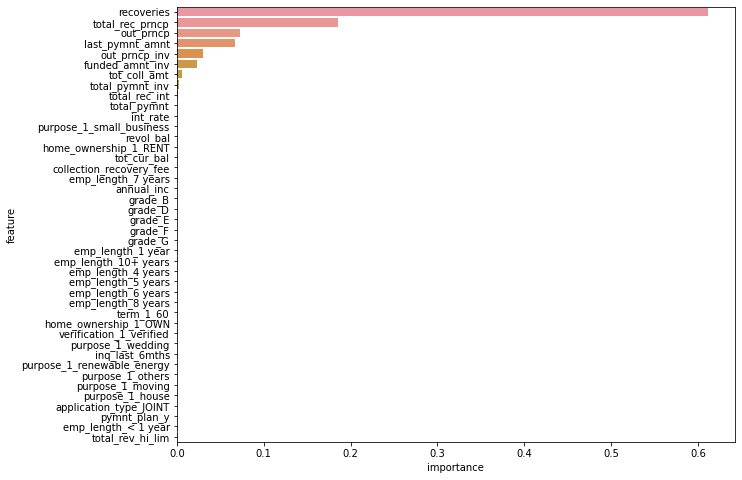

In [75]:
feature_importances=pd.DataFrame({'importance' : pipeline_gb['gb_classifier'].feature_importances_,'feature': Xtrain.columns})
feature_importances=feature_importances.sort_values('importance', ascending = False)
plt.figure(figsize=(10, 8))
sns.barplot(y = 'feature', x = 'importance', data = feature_importances)